In [ ]:
'''
자연에서 비례하는 값 > 선형으로 그래프가 나옴 (1차 제외 거의 비선형)
자연값에 가장 오차가 적게 나는 그래프가 최적 > 이걸 찾는 걸 fitting이라고 함
y=ax+b=b0+b1x1 b1> x1가 y에게 얼마나 영향을 미치느냐
               b0> 원하는대로 fitting이 안됨(bias,바이어스, 편향)
독립변수가 늘 때마다 x가 늘어남 
y=b0+b1x1+b2x2+b3x3… 
오차 관련해서 제곱해서 처리함.(그냥 더하는 경우 상쇄)
R squrare-설명력 (0<x<1) 1= 독립변수로 종속변수를 전부 다 설명이 가능
                        0= 독립변수로 종속변수를 전혀 설명 못 함   보통 사회과학 0.4 /실험실 07~0.8 정도가 영향이 있다고 함 
 
#하이퍼 플레인                        
                        '''

In [1]:
import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
#sep> 구분자( \s는 공백을, +는 1개이상(0개이상은 *)을 의미한다.)
#skiprows>22줄을 건너뜀, header>데이터가 없어서 없다고 함
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#데이터가 2줄로 나눠져 있음(INPUT(독립변수)들이 나눠져 있음)
#raw_df.values[::2, :]>>한칸씩 건너뛰면서 슬라이싱해서 왼쪽을 만듬
#raw_df.values[1::2, :2]>>한칸씩 건너뛰면서 슬라이싱해서 오른쪽을 만듬 // :2>>마지막이 집값이라 그건 빼고 진행
target = raw_df.values[1::2, 2] #target>>집값(OUTPUT(종속변수))
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [13]:
print(data.shape, target.shape)

(506, 13) (506,)


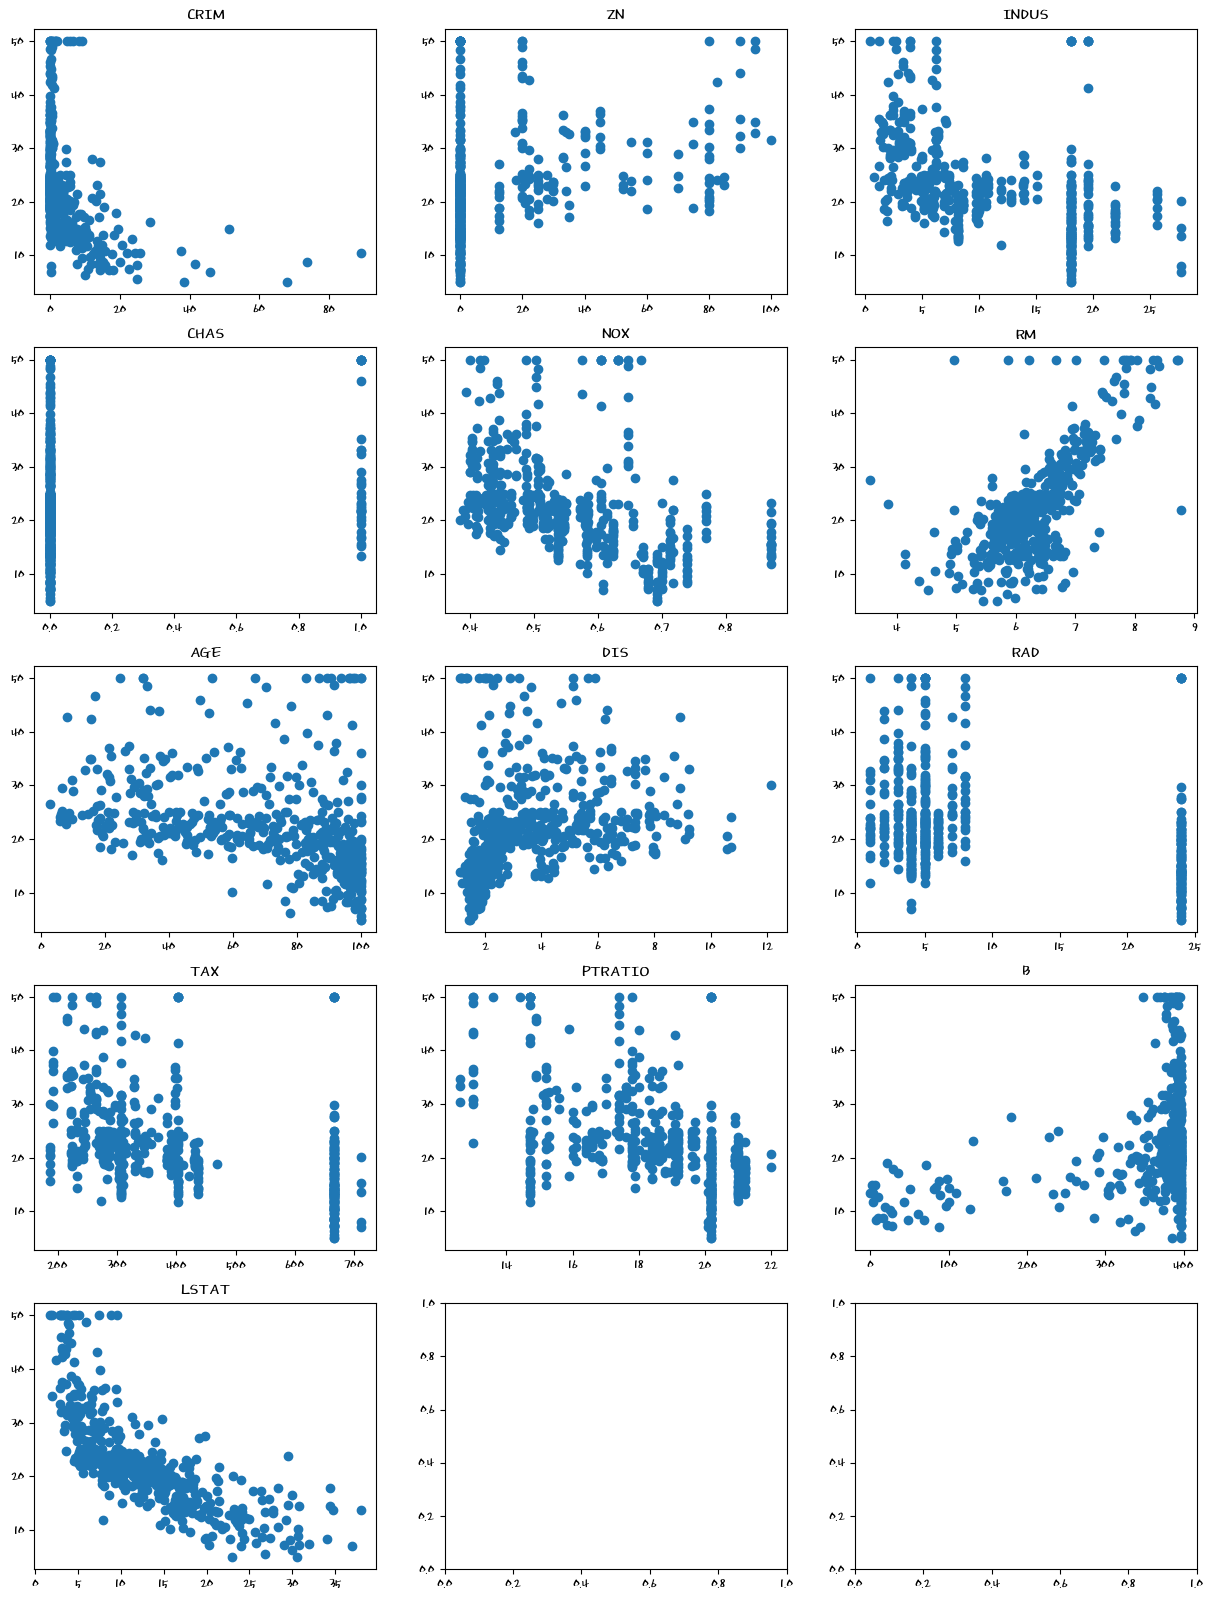

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\HYBDAL.TTF").get_name()   #윈도우
#font_name = 'AppleGothic'  #맥 OS 
rc('font', family=font_name) 			

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(5, 3, figsize=(15, 20)) #전체 그림판과 각각의 subplot을 반환
y = target

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < data.shape[1]: #그려야 할 변수는 13개인데 subplot의 수는 3*5 = 15개
        x = data[:,i]  # 즉 그려야 할 변수에 대해서만 그래프를 그림
        # 대상이 되는 변수만 x에 골라냄

        ax.set_title(feature_names[i]) # subplot의 제목을 변수의 이름으로
        ax.scatter(x, y)
plt.show()

In [31]:
#Num
data[:,5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [7]:
#Pan
import pandas as pd
df_data=pd.DataFrame(data, columns=feature_names)
df_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
data[:, 5:6].shape

(506, 1)

In [9]:
from sklearn.model_selection import train_test_split
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(data, target, test_size=0.2) #Numpy #test_size를 명시하지 않으면 0.25
X_train, X_test, Y_train, Y_test = train_test_split(df_data, target, test_size=0.2) #Pandas
#x가 독립, y가 종속 train 훈련용 test 시험용   
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

#과적합 >>문제집을 외운 것과 같음 >>머신러닝에서 원하는 건 답을 외우는 게 아니라 일반화 능력
#그래서 학습용과 테스트 데이터를 분리해놓음 >>학습이 x된 데이터를 사용 

(404, 13) (404,)
(102, 13) (102,)


In [41]:
#Pan num처럼 slicing
X_train.iloc[:,[5]]
#X_train[['RM']] #2차원
#X_train.RM

6      6.012
97     8.069
23     5.813
493    5.707
319    6.113
       ...  
386    4.652
339    5.985
324    6.415
124    5.879
94     6.249
Name: RM, Length: 404, dtype: float64

In [6]:
#simple linear regression
#import>객체 생성>fit() 적용>모형 기본정보 확인> score()로 성능 검사>predict() 

from sklearn.linear_model import LinearRegression
# graph에서 RM이 정의 방향으로 유의한 영향을 끼치는 것으로 보이므로, RM을 독립변수로 선택

lr = LinearRegression()  #객체를 생성, ()내부에 setting해야하는 값 집어넣기 

lr.fit(X_train[['RM']], Y_train) #fitting = 학습
#기본적으로 LinearRegression은 다중회귀분석을 수행하므로 독립변수가 당연히 여럿일 것을 가정함
# X_train[:, 5]는 하나의 변수에 대한 값들로 이루어진 벡터이므로 에러가 발생
# 에러를 방지하기 위해서는 reshape을 이용해 하나의 변수라 하더라도 행렬 형태로 변환해줘야 함 > np:[:,[5]or5:6] pd:[[]] or reshape

print(lr) # 모형정보를 확인, 사용된 parameter를 알 수 있음 

LinearRegression()


In [45]:
#reshape
data[:, 5].reshape(-1, 1).shape
# -1>갯수를 가지고 너가 알아서 해라 (2,3)>(3,2)할 때 6개이므로 (3,2)에 3이 비어있어도 예상 가능 1>원하는 차원

(506, 1)

In [8]:
print('coef_', lr.coef_) #계수 - 즉 기울기
print('intercept_', lr.intercept_) #상수

coef_ [9.00019959]
intercept_ -34.0217623832585


In [11]:
#print('R2 score for train set', lr.score(X_train[:,5].reshape(-1, 1), Y_train)) #Num train set에 대한 적합도 - 모형이 얼마나 잘 맞나
print('R**2 score for train set', lr.score(X_train[['RM']], Y_train)) #Pan
print('R**2 score for test set', lr.score(X_test[['RM']], Y_test))
#train set에 대한 적합도 - 모형이 얼마나 잘 맞나

R**2 score for train set 0.47278238121071026
R**2 score for test set 0.5198435036329964


In [13]:
# test set에 대한 예측 NUM
#P_test = lr.predict(X_test[:,5].reshape(-1, 1)) #predict 함수를 이용
#print('prediction', P_test)
#print('R2 score for test set', lr.score(X_test[:,5].reshape(-1, 1), Y_test)) #test set에 대한 적합도

P_test = lr.predict(X_test[['RM']]) #predict 함수를 이용
print(P_test.shape)
print('prediction', P_test)
print('R2 score for test set', lr.score(X_test[['RM']], Y_test))

(102,)
prediction [22.78749741 24.33553174 24.06552575 29.19563951 20.25844132 27.12559361
  7.84716609 14.82232077 21.48246847 14.60631598 13.71529622 21.01445809
 19.96143474 20.55544791 19.31342037 21.86047685 18.6384054  19.33142077
 18.29639781 17.00936927 22.68849521 14.2373078  23.90352216 18.5124026
 21.14946108 22.994502   27.72860698 41.56191374 14.68731778 25.43355609
 32.75971855 19.67342835 44.31597482 18.02639183 12.65327267 20.62744951
 20.24944112 25.54155848 22.82349821 27.62060458 17.79238664 20.22244052
 10.31322078 23.62451597 23.62451597 19.59242655 18.81840939 18.98041298
 21.34746547 18.6294052  19.76343035 21.12246048 21.61747146 23.37251038
 26.04556966 24.59653752 18.6924066  19.62842735 16.10934931  0.74600862
 23.08450399 25.69456187 44.50497901 26.72058463 23.56151457 36.19779479
 19.25941917 22.22948503 16.4243563  21.27546388 22.58949302 20.60044891
 18.87241059 24.21852914 26.41457784 22.81449801 30.58167025 19.66442815
 23.39951098 25.0825483  19.034414

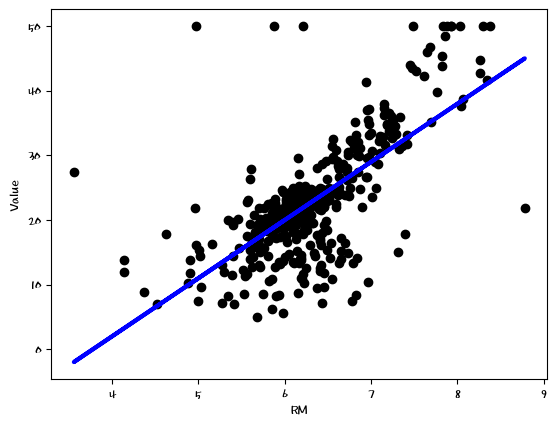

In [27]:
Y_predict = lr.predict(X_train[['RM']])
plt.xlabel(feature_names[5])
plt.ylabel('Value')
plt.scatter(X_train['RM'], Y_train, color='black') #검은 점은 실제 값
plt.plot(X_train['RM'], Y_predict, color='blue', linewidth=3) #예측된 값은 직선이 됨
plt.show()

In [13]:
#simple linear regression 예제 하나 더
from sklearn.linear_model import LinearRegression

# graph에서 LSTAT이 역방향으로 유의한 영향을 끼치는 것으로 보이므로, LSTAT을 독립변수로 선택
lr = LinearRegression().fit(X_train[['LSTAT']], Y_train) #dependent variable이 한 개인 경우에는 reshape를 해줘야 함
# 위 예는 객체생성과 fit을 한번에 수행

print(lr) #사용된 parameter를 알 수 있음 

LinearRegression()


In [37]:
#모형 기본 정보 보기
print('coef_', lr.coef_) #기울기, 그래프를 생각하면 음수가 나와야 함
print('intercept_', lr.intercept_)
print('R2 score for train set: {:.3f}'.format(lr.score(X_train[['LSTAT']], Y_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(X_test[['LSTAT']], Y_test)))

coef_ [-0.95718011]
intercept_ 34.72016834652696
R2 score for train set: 0.566
R2 score for test set: 0.461


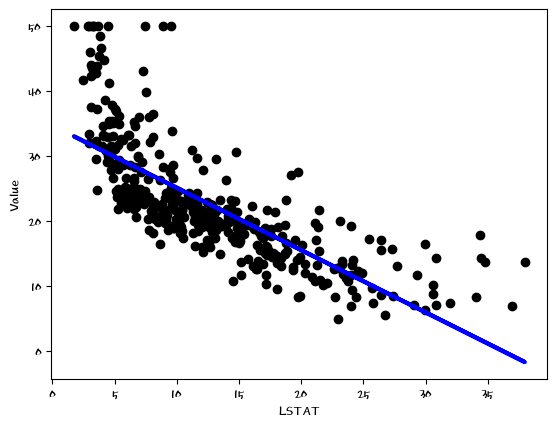

In [39]:
Y_predict = lr.predict(X_train[['LSTAT']])
plt.xlabel(feature_names[-1])
plt.ylabel('Value')
plt.scatter(X_train['LSTAT'], Y_train, color='black') #검은 점은 실제 값
plt.plot(X_train['LSTAT'], Y_predict, color='blue', linewidth=3) #예측된 값은 직선이 됨
plt.show()

In [41]:
lr = LinearRegression().fit(X_train, Y_train)
print(lr) #사용된 parameter를 알 수 있음 

print('coef_', lr.coef_) #사용된 모든 독립변수에 대한 계수(기울기)를 반환
print('intercept_', lr.intercept_)

LinearRegression()
coef_ [-1.06617444e-01  5.81327146e-02  2.74355647e-02  1.92182329e+00
 -1.91234552e+01  3.56995786e+00  1.26108384e-02 -1.43421409e+00
  3.32484403e-01 -1.47566561e-02 -8.71354517e-01  8.69229390e-03
 -5.53027651e-01]
intercept_ 37.37513461165285


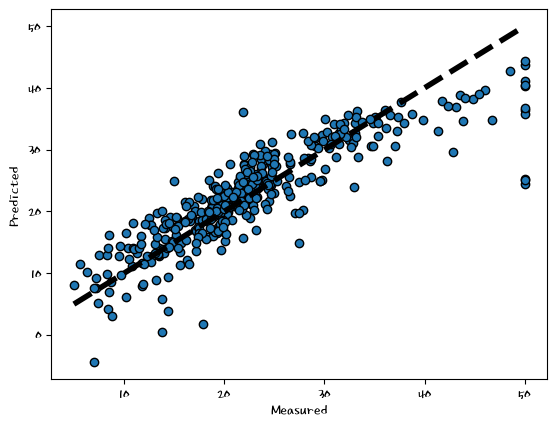

In [43]:
predicted = lr.predict(X_train) #먼저 값을 예측

fig, ax = plt.subplots()
ax.scatter(Y_train, predicted, edgecolors=(0, 0, 0)) #실제값과 예측값으로 점을 찍어 표시 - 둘이 다를 수 있음
ax.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=4) #실제값과 예측값이 같은 지점을 연결해서 선을 표시
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [45]:
print('R2 score for train set: {:.3f}'.format(lr.score(X_train, Y_train)))
print('R2 score for test set: {:.3f}'.format(lr.score(X_test, Y_test)))

R2 score for train set: 0.750
R2 score for test set: 0.694


In [ ]:
'''feature scaling 
두 값이 비슷한 영향을 끼쳐도, 값의 규모가 다르면 예측치가 이상하게 측정 x1=>돈 x2=>자녀수 인 경우 x1이 훨씬 더 영향력이 커 보임
min-max scaler         standard scaler
x-min/max-min           표준 정규 분포 -3<x<3            
선형회귀에선 모형을 가지고 예측만 할 거면 상관없지만 독립변수가 미치는 영향을 확인하고 싶으면 해야함
'''

In [47]:
#multiple linear regression Standardize 예제
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
#test셋을 빼고 > test는 검토용이므로 값을 미리 알게 되면 안됨 전체로 돌리면 min max 평균 표준편차를 예측할 때 test 값을 예상하게 됨.
#fit > 지금 min max 평균 표준편차를 뽑아오고 있는 거
#scaler > 값을 맞춤
print('scaler mean:', scaler.mean_)
print('scaler variance:', scaler.var_)

scaled_X_train = scaler.transform(X_train) #변환 
scaled_X_test = scaler.transform(X_test) #변환
#train의 평균과 표준편차를 test에도 사용하느냐 아님 새로 구하느냐 > 절대 새로 구하면 안됌.
#train의 학습된 것에 test의 값을 넣어야함. > 새로 만들면 서로 다른 모형(train과 test의 값)으로 들어가게 됨

StandardScaler()
scaler mean: [3.52427124e+00 1.20049505e+01 1.09624010e+01 6.18811881e-02
 5.51180198e-01 6.30018812e+00 6.74059406e+01 3.85864233e+00
 9.58910891e+00 4.07792079e+02 1.84111386e+01 3.59531658e+02
 1.25775495e+01]
scaler variance: [6.55360993e+01 5.82990075e+02 4.77846930e+01 5.80519067e-02
 1.35059900e-02 4.83553806e-01 8.13835361e+02 4.58546125e+00
 7.67420596e+01 2.85868330e+04 4.66252445e+00 7.47136728e+03
 5.12063705e+01]


In [51]:
slr = LinearRegression()
slr.fit(scaled_X_train, Y_train)
print('coef_', slr.coef_)
print('intercept_', slr.intercept_)

coef_ [-0.8631148   1.40362529  0.18965238  0.4630434  -2.22243759  2.48247848
  0.35975947 -3.0711816   2.912648   -2.49500247 -1.88150531  0.75133643
 -3.95738992]
intercept_ 22.68118811881188


In [53]:
print('R2 score for train set: {:.3f}'.format(slr.score(scaled_X_train, Y_train)))
print('R2 score for test set: {:.3f}'.format(slr.score(scaled_X_test, Y_test)))

R2 score for train set: 0.750
R2 score for test set: 0.694


In [97]:
#다항식 변환
#우선 선형 다시 한 번 
# graph에서 LSTAT이 역방향으로 유의한 영향을 끼치는 것으로 보이므로, LSTAT을 독립변수로 선택
lr = LinearRegression().fit(Xn_train[:,-1].reshape(-1, 1), Yn_train) #dependent variable이 한 개인 경우에는 reshape를 해줘야 함
# 위 예는 객체생성과 fit을 한번에 수행

#모형 기본 정보 보기
print('coef_', lr.coef_) #기울기, 그래프를 생각하면 음수가 나와야 함
print('intercept_', lr.intercept_)
print('R2 score for train set: {:.3f}'.format(lr.score(Xn_train[:,-1].reshape(-1, 1), Yn_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(Xn_test[:,-1].reshape(-1, 1), Yn_test)))

coef_ [-0.98080446]
intercept_ 34.88143056781922
R2 score for train set: 0.543
R2 score for test set: 0.545


In [99]:
#x제곱을 계산
X2 = Xn_train[:, -1]**2
X2.shape

(404,)

In [101]:
X3 = Xn_train[:, [-1]] #X2 = Xn_train[:, -1].reshape(-1, 1)
X3.shape

(404, 1)

In [103]:
#제곱계산
X4= X3**2
X4.shape

(404, 1)

In [105]:
Xn_train_new = np.hstack((X3, X4))

In [107]:
#hstack > 옆으로 이어붙임 vstack> 위아래로 이어붙임
X_h=np.hstack((Xn_train, Xn_train))
X_v=np.vstack((Xn_train, Xn_train))
(X_h).shape

(404, 26)

In [109]:
(X_v).shape

(808, 13)

In [111]:
#x와 x제곱을 묶어서 train set으로 만들기 위해 vstack을 사용
Xn_train_new = np.vstack((Xn_train[:, -1], X2))
Xn_train_new.shape

(2, 404)

In [119]:
Yn_train.shape

(404,)

In [141]:
#전치를 해서 새로운 데이터 셋을 생성
Xn_train_new = Xn_train_new.T
Xn_test_new = np.vstack((Xn_test[:, -1], Xn_test[:, -1]**2)).T

lr = LinearRegression().fit(Xn_train_new, Yn_train)

In [143]:
#모형 기본 정보 보기
print('coef_', lr.coef_) #기울기, 그래프를 생각하면 음수가 나와야 함
print('intercept_', lr.intercept_)
print('R2 score for train set: {:.3f}'.format(lr.score(Xn_train_new, Yn_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(Xn_test_new, Yn_test)))

coef_ [-2.37460554  0.04475951]
intercept_ 43.16252074501172
R2 score for train set: 0.641
R2 score for test set: 0.636


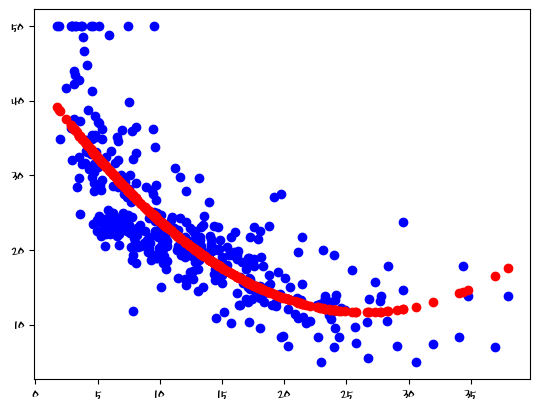

In [147]:
plt.plot(Xn_train[:, -1], Yn_train, 'bo')
plt.plot(Xn_train[:, -1], lr.predict(Xn_train_new), 'ro')
plt.show()